# Show Entropy Lower Bound

- Lecture derives that $$H(X)\geq -\log_2\left( \sum\limits_{x\in\mathcal{X}} \left( P(x) \right)^2 \right)$$
- Simulation at hand depicts the according result for a binary source and, thus, the binary entropy function
- Furthermore, "Monte-Carlo-proof" the lower bound is never violated within a large number of exemplary sources

## Importing and Helpful Functions

In [1]:
# make sure you've got the following packages installed
import numpy as np

###
# choose for showing figures in external window or inline
###

#%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

### Illustrate for binary source

In [3]:
# define binary entropy function
def get_H( p ):

    H = 0
    for ind_p, val_p in enumerate( p ):
        H += - val_p * np.log2( val_p ) if val_p not in [0, 1] else 0 
    return H

def get_bound( p ):
    argument = 0
    for ind_p, val_p in enumerate( p ):
        argument += val_p **2
    return -np.log2( argument )

In [4]:
# get analytical solution 1
delta_p = .01
p = np.arange( 0, 1+delta_p, delta_p )

H = np.zeros_like( p )
for ind_p, val_p in enumerate( p ):
    H[ ind_p ] = get_H( np.array( [ val_p, 1-val_p] ) )

bound = np.zeros_like( p )
for ind_p, val_p in enumerate( p ):
    bound[ ind_p ] = get_bound( [ val_p, 1-val_p]  )


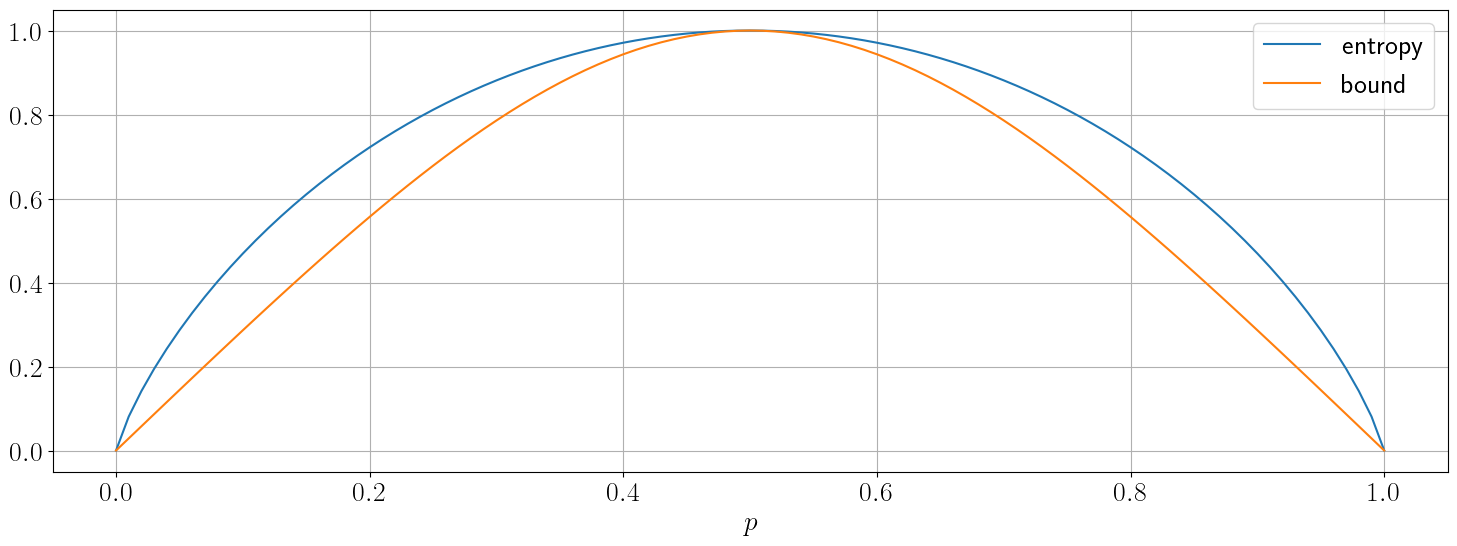

In [5]:
plt.plot( p, H, label='entropy')
plt.plot( p, bound, label='bound')
plt.xlabel('$p$')
plt.grid(1)
plt.legend()


### Now illustrate for N dim sources

+ Note: We are not checking all values but using Monte-Carlo to see if there is a counter-example

In [6]:
N = 50
N_trials = int( 1e5 )

rng = np.random.default_rng()
valid = True

for _n in range( N_trials ):
    p = rng.random( N )
    p /= np.sum(p)
 
    if get_H( p ) < get_bound( p ):
        valid = False
        break

if valid:
    print('At least for {:1.2E} trials in {:d} dimensions everything went fine! ;-)'.format( N_trials, N ) )
else:
    print('Ops, the bound is not valid for p = {}! :-('.format( p ) )

At least for 1.00E+05 trials in 50 dimensions everything went fine! ;-)


### Illustrate for fair dice

In [7]:
p = np.ones( 6 ) / 6
print('Entropy = \t{}'.format( get_H(p) ) )
print('Bound = \t{}'.format( get_bound(p) ) )

Entropy = 	2.584962500721156
Bound = 	2.584962500721156
